In [7]:
import os
os.environ['PROJ_LIB'] = '/opt/conda/share/proj'

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
from mpl_toolkits.basemap import Basemap

In [1]:
#df = pd.read_csv('statsdb/b30 stats.csv')
#df.head()

In [8]:
df = pd.read_excel('b30 stats.xlsx')
df.head()

,date,datenormal,date_gap,disp,flags,lat,lon,mask,size,vel_angle,worldview url,Notes,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,2012145.0,2012-05-24,0.0,0.0,13.0,-74.769,-107.356,0.0,10.0,0.0,NaN,NaN,NaN,NaN,Mask Values,NaN
1,2012146.0,2012-05-25,1.0,0.0,13.0,-74.769,-107.356,0.0,10.0,0.0,NaN,NaN,NaN,NaN,#,Surrounding
2,2012147.0,2012-05-26,1.0,0.0,13.0,-74.769,-107.356,0.0,10.0,0.0,NaN,NaN,NaN,NaN,0,Near Land or no data
3,2012148.0,2012-05-27,1.0,0.0,13.0,-74.769,-107.356,0.0,10.0,0.0,NaN,NaN,NaN,NaN,1,Sea Ice
4,2012149.0,2012-05-28,1.0,0.0,13.0,-74.769,-107.356,0.0,10.0,0.0,NaN,NaN,NaN,NaN,2,Open Ocean


In [9]:
len(df)

1847

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


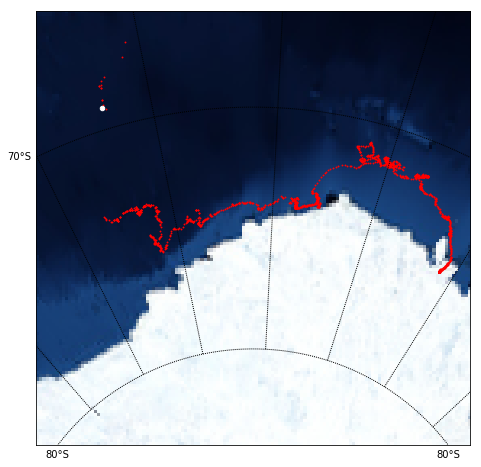

In [10]:
plt.figure(figsize=(8,8))
m = Basemap(projection='aeqd', resolution='l', lat_0=-75, lon_0=-138, width=2000000, height=2000000)
            #llcrnrx=0, llcrnry=0, urcrnrx=10000, urcrnry=10000)
            #llcrnrlon=0.,llcrnrlat=-60.,urcrnrlon=-180.,urcrnrlat=-60.)
m.drawmeridians(np.arange(0,360,15))
m.drawparallels(np.arange(-90,90,10), labels=[1,0,0,1])

lons = df['lon'].values
lats = df['lat'].values

x, y = m(lons, lats)

m.scatter(x, y, 3, marker='.', color='r')
m.scatter(x[-1], y[-1], 20, marker='o', color='white')
m.bluemarble(scale=0.5)

In [11]:
!ls

 ALTIBERG.ipynb
'b30 stats.xlsx'
'B30 Track.ipynb'
 basemaptest.ipynb
 CS_OFFL_SIR_SAR_2__20170110T012919_20170110T013216_C001.kml
'Iceberg Tracks.ipynb'
 NIC
 prod_latlon_merged_2017.nc
 statsdb
